## **MUHAMMAD USMAN**

### **CREDIT SCORE PRDICTION PROJECT**

In [1]:
# Importing the necessary Documents
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import  roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import auc
import joblib, pickle
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the Dataset
# Loading Datasets
df = pd.read_csv('credit_score.csv')

# Display the first five rows
display(df.head())

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [3]:
# Review Data types and summary statistics
display(df.info())
print("=============================================")
display(df.describe())
print("=============================================")
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

None

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


(68654, 16)

In [4]:
# Checking for Duplicates and Null Values
display(df.isnull().sum())
print("=============================================")
display(df.duplicated().sum())
print("=============================================")
display(df.dtypes)

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

0

ID                              object
customer_id                      int64
country_id                      object
tbl_loan_id                      int64
lender_id                        int64
loan_type                       object
Total_Amount                   float64
Total_Amount_to_Repay          float64
disbursement_date               object
due_date                        object
duration                         int64
New_versus_Repeat               object
Amount_Funded_By_Lender        float64
Lender_portion_Funded          float64
Lender_portion_to_be_repaid    float64
target                           int64
dtype: object

In [5]:
# Removing the irrelevant features
df = df.drop(['ID'], axis = 1)

In [6]:
# Segragating Numerical and Categorical Variables
cat_variables = df.select_dtypes(include=['object']).columns
num_variables = df.select_dtypes(include=['int64', 'float64']).columns
display(cat_variables)
print('==================================')
display(num_variables)

Index(['country_id', 'loan_type', 'disbursement_date', 'due_date',
       'New_versus_Repeat'],
      dtype='object')

Index(['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount',
       'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender',
       'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

### Data Preprocessing and Feature Engineering

In [7]:
# Segregating numerical and categorical features
x_num = df[num_variables.drop('target')]
x_cat = df[cat_variables] 

In [8]:
# Encoding Categorical Data by using one hot encoder
encoder = OneHotEncoder(sparse=False)
x_cat_encoded =pd.DataFrame(encoder.fit_transform(x_cat), columns=encoder.get_feature_names_out())

x_cat_encoded

,country_id_Kenya,loan_type_Type_1,loan_type_Type_10,loan_type_Type_11,loan_type_Type_12,loan_type_Type_13,loan_type_Type_14,loan_type_Type_15,loan_type_Type_16,loan_type_Type_17,...,due_date_2024-12-03,due_date_2024-12-07,due_date_2024-12-25,due_date_2025-01-06,due_date_2025-01-10,due_date_2025-06-22,due_date_2025-07-02,due_date_2025-10-27,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68650,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68651,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68652,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Combine the  numerical and categorical features
x_processed = pd.concat([x_num, x_cat_encoded], axis=1)
x_processed

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,country_id_Kenya,...,due_date_2024-12-03,due_date_2024-12-07,due_date_2024-12-25,due_date_2025-01-06,due_date_2025-01-10,due_date_2025-06-22,due_date_2025-07-02,due_date_2025-10-27,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan
0,266671,248032,267278,8448.0,8448.0,7,120.85,0.014305,121.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,248919,228515,267278,25895.0,25979.0,7,7768.50,0.300000,7794.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,308486,370501,251804,6900.0,7142.0,7,1380.00,0.200000,1428.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,266004,285009,267278,8958.0,9233.0,7,2687.40,0.300000,2770.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,253803,305312,267278,4564.0,4728.0,7,1369.20,0.300000,1418.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,244559,228408,267278,1460.0,1515.0,7,438.00,0.300000,455.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68650,260062,217784,267278,5029.0,5116.0,7,1508.70,0.300000,1535.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68651,259137,216701,267278,5289.0,5289.0,7,1586.70,0.300000,1587.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68652,266801,303201,267278,3334.0,3334.0,7,741.09,0.222283,741.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Splitting Dataset into features & Labels
x = x_processed # x is the features
y = df['target'] # y is the Target Variable
# Splittint Datasets into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### Logistic Regression

In [12]:
# Initialization of Logistic Regression
log_model = LogisticRegression(max_iter=1000)
# Train the model
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Predict the model
log_pred = log_model.predict(x_test)
# Predicting Probablities
y_pred_prob = log_model.predict_proba(x_test)[:, 1]

#### Model Evaluation

In [15]:
log_acc = accuracy_score(y_test, log_pred)

roc_auc_log= roc_auc_score(y_test, y_pred_prob)



print("RESULTS")
print(f"Accuracy is: {round(log_acc,2)}")
print(f"ROC Score is: {round(roc_auc_log, 2)}")

RESULTS
Accuracy is: 0.98
ROC Score is: 0.86


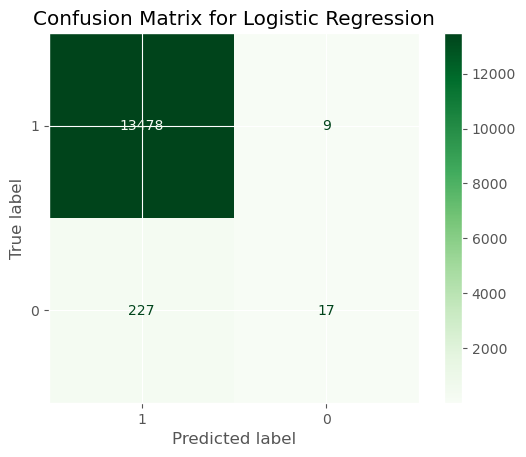

In [17]:
# Confusion Matrix
log_conf_matrix = confusion_matrix(y_test, log_pred)
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_conf_matrix, display_labels=['1', '0'])
log_reg_disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


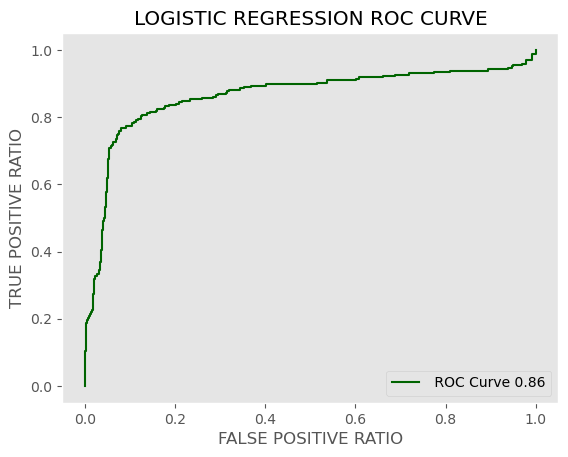

In [19]:
# ROC curve
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_prob)
log_auc = auc(fpr_log, tpr_log)

# Plot ROC Curve
plt.plot(fpr_log, tpr_log, color='darkgreen', label=f' ROC Curve {log_auc:.2f}')
plt.title('LOGISTIC REGRESSION ROC CURVE')
plt.legend(loc='lower right')
plt.xlabel('FALSE POSITIVE RATIO')
plt.ylabel('TRUE POSITIVE RATIO')
plt.grid()